In [218]:
%pylab inline
import pandas as pd
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import seaborn as sns

from IPython.display import Image
from IPython.core.display import HTML

Populating the interactive namespace from numpy and matplotlib


Loading and primary data analysis

In [219]:
girls = pd.read_csv('./data/girls.csv', header=0)

In [220]:
girls.head()

,Month,Year,Bust,Waist,Hips,Height,Weight
0,December,1953,91,61,91,165,54
1,March,1954,86,61,89,168,54
2,July,1955,91,61,91,166,52
3,December,1955,91,61,91,166,52
4,July,1956,91,61,86,157,48


In [221]:
girls.tail()

,Month,Year,Bust,Waist,Hips,Height,Weight
599,September,2008,86,64,91,170,52
600,October,2008,86,61,86,165,52
601,November,2008,86,53,81,168,49
602,December,2008,86,64,89,173,52
603,January,2009,86,60,91,170,55


In [222]:
girls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604 entries, 0 to 603
Data columns (total 7 columns):
Month     604 non-null object
Year      604 non-null int64
Bust      604 non-null int64
Waist     604 non-null int64
Hips      604 non-null int64
Height    604 non-null int64
Weight    604 non-null int64
dtypes: int64(6), object(1)
memory usage: 33.1+ KB


In [223]:
girls.describe()

,Year,Bust,Waist,Hips,Height,Weight
count,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000
mean,1983.057947,89.293046,59.529801,87.942053,167.887417,52.168874
std,14.843740,3.994011,3.616909,3.479142,5.776711,4.040585
min,1953.000000,81.000000,46.000000,61.000000,150.000000,42.000000
25%,1970.000000,86.000000,58.000000,86.000000,165.000000,49.000000
50%,1983.000000,89.000000,61.000000,89.000000,168.000000,52.000000
75%,1996.000000,91.000000,61.000000,91.000000,173.000000,54.000000
max,2009.000000,104.000000,89.000000,99.000000,188.000000,68.000000


In [224]:
girls.median()

Year      1983.0
Bust        89.0
Waist       61.0
Hips        89.0
Height     168.0
Weight      52.0
dtype: float64

In [225]:
girls[girls['Waist'] == 89]

,Month,Year,Bust,Waist,Hips,Height,Weight
483,December,1998,86,89,86,173,52


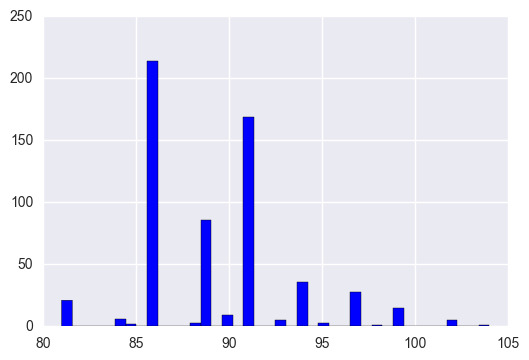

In [226]:
girls['Bust'].hist(bins=40, facecolor='blue', label="Bust")

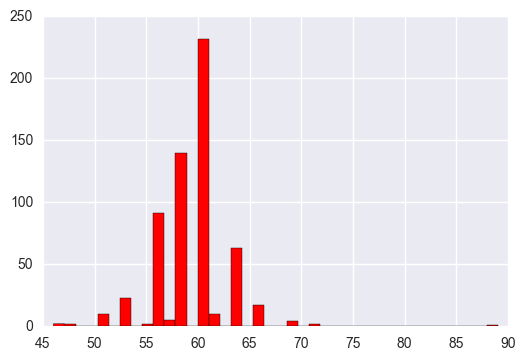

In [227]:
girls['Waist'].hist(bins=40, label="Waist", facecolor='red')

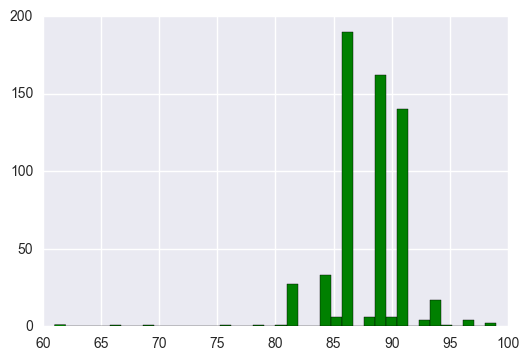

In [228]:
girls['Hips'].hist(bins=40, label="Hips", facecolor='green')

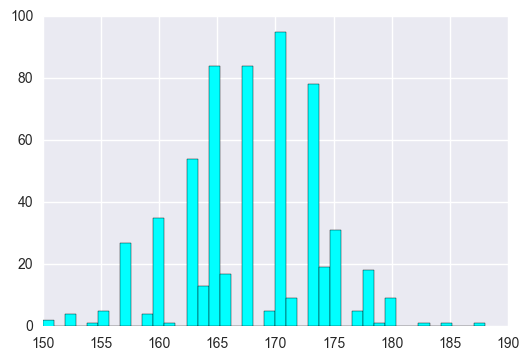

In [229]:
girls['Height'].hist(bins=40, label="Height", facecolor='cyan')

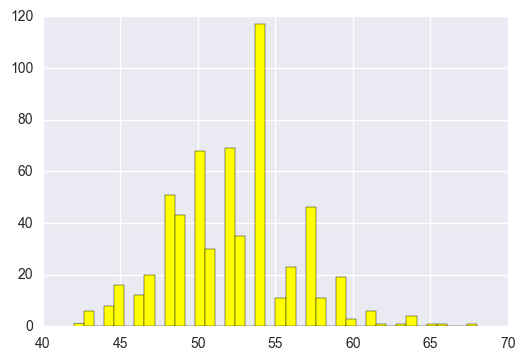

In [230]:
girls['Weight'].hist(bins=40, label="Weight", facecolor='yellow')

In [231]:
girl_params = np.array(girls.values[:,2:], dtype="float64")

In [232]:
girl_params

array([[  91.,   61.,   91.,  165.,   54.],
       [  86.,   61.,   89.,  168.,   54.],
       [  91.,   61.,   91.,  166.,   52.],
       ..., 
       [  86.,   53.,   81.,  168.,   49.],
       [  86.,   64.,   89.,  173.,   52.],
       [  86.,   60.,   91.,  170.,   55.]])

In [233]:
girl_params = scale(girl_params)

In [234]:
girl_params

array([[ 0.42773253,  0.40681624,  0.87966554, -0.50025187,  0.45355897],
       [-0.82517944,  0.40681624,  0.30433475,  0.01950523,  0.45355897],
       [ 0.42773253,  0.40681624,  0.87966554, -0.3269995 , -0.04182913],
       ..., 
       [-0.82517944, -1.80685052, -1.99698843,  0.01950523, -0.78491128],
       [-0.82517944,  1.23694128,  0.30433475,  0.88576708, -0.04182913],
       [-0.82517944,  0.1301079 ,  0.87966554,  0.36600997,  0.70125302]])

In [235]:
X = PCA(n_components=2).fit_transform(girl_params)

In [236]:
X

array([[-0.73042102, -0.66639633],
       [-0.29175855,  0.65458791],
       [-0.5218909 , -0.62817574],
       ..., 
       [ 2.31385976,  0.57353099],
       [-0.71721598,  1.34017059],
       [-0.74295332,  0.48915311]])

In [237]:
girls_num = X.shape[0]

In [238]:
girls_num

604

Girl with the shortest waist

In [239]:
girls[girls['Waist'] == min(girls['Waist'])].head(1)

,Month,Year,Bust,Waist,Hips,Height,Weight
33,November,1960,84,46,81,157,45


In [240]:
Image(url='https://images.contentbody.com/1mYZtnxGr2WMgcSwQOgYum/w1564_h880')

Girl with the biggest bust

In [241]:
girls[girls['Bust'] == max(girls['Bust'])].head(1)

,Month,Year,Bust,Waist,Hips,Height,Weight
79,October,1964,104,64,97,168,66


In [242]:
Image(url='https://images.contentbody.com/2j3WZClkjqUEgESWw8s2w0/w1564_h880')

Girl with the largest hips

In [243]:
girls[girls['Hips'] == max(girls['Hips'])].head(1)

,Month,Year,Bust,Waist,Hips,Height,Weight
52,July,1962,99,58,99,170,59


In [244]:
Image(url='https://images.contentbody.com/3Qc3ozlFSgwK4e0y6coaOa/embeds/1/w900_h720')

Girl with the biggest height

In [245]:
girls[girls['Height'] == max(girls['Height'])].head(1)

,Month,Year,Bust,Waist,Hips,Height,Weight
507,December,2000,86,66,91,188,61


In [246]:
Image(url='https://images.contentbody.com/6ArjdUgwzmq8EkoWksCWOG/w1564_h880')

Girls with the lowest height

In [247]:
girls[girls['Height'] == min(girls['Height'])].head(1)

,Month,Year,Bust,Waist,Hips,Height,Weight
85,April,1965,86,51,86,150,44


In [248]:
Image(url='http://playmate.uw.hu/pictures/6504.jpg')

Girl with the largest weight

In [249]:
girls[girls['Weight'] == max(girls['Weight'])].head(1)

,Month,Year,Bust,Waist,Hips,Height,Weight
67,October,1963,94,66,94,183,68


In [250]:
Image(url='https://images.contentbody.com/2HqYmgr8N2mU8SqmGe8UGk/embeds/1/w900_h720')

Girl with the smallest weight

In [251]:
girls[girls['Weight'] == min(girls['Weight'])].head(1)

,Month,Year,Bust,Waist,Hips,Height,Weight
121,May,1968,84,53,89,157,42


In [252]:
Image(url='https://thecampofthesaints.files.wordpress.com/2010/12/angela-dorian-1967-09-0013.jpg')

We shall create a new BMI column - body mass index that equals to weight divided by height in squared meters

In [253]:
girls['BMI'] = 100 ** 2 * girls['Weight'] / (girls['Height'] ** 2)

In [254]:
girls['BMI'].head()

0    19.834711
1    19.132653
2    18.870663
3    18.870663
4    19.473407
Name: BMI, dtype: float64

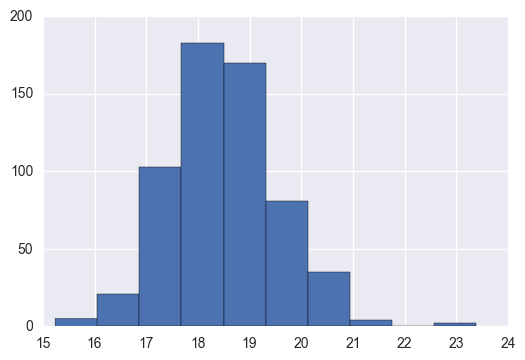

In [255]:
girls['BMI'].hist()

Wikipedia is saying that normal BMI is equal to 18,5 — 24,99.

As we see that the average index of Playboy models is around the lower limit of normal.
We will select women with a BMI of 18 to 18.5.

In [256]:
selected_girls = girls[(girls['BMI'] >= 18) & 
      (girls['BMI'] <= 18.5)]

Let's find ideal women regarding to height and bust parameters

In [257]:
selected_girls.sort(columns=['Height', 'Bust'], 
                    ascending=[False, False]).head(1)

C:\Users\ydubovyi\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,Month,Year,Bust,Waist,Hips,Height,Weight,BMI
430,July,1994,91,61,91,180,59,18.209877


It's Miss July 1994 Traci Adell.
Further assistance in the search engine.
This choice is unlikely to disappoint.
This is the most "decent" photo that I've found.

In [258]:
Image(url="https://st.kp.yandex.net/images/actor_iphone/iphone360_68436.jpg")

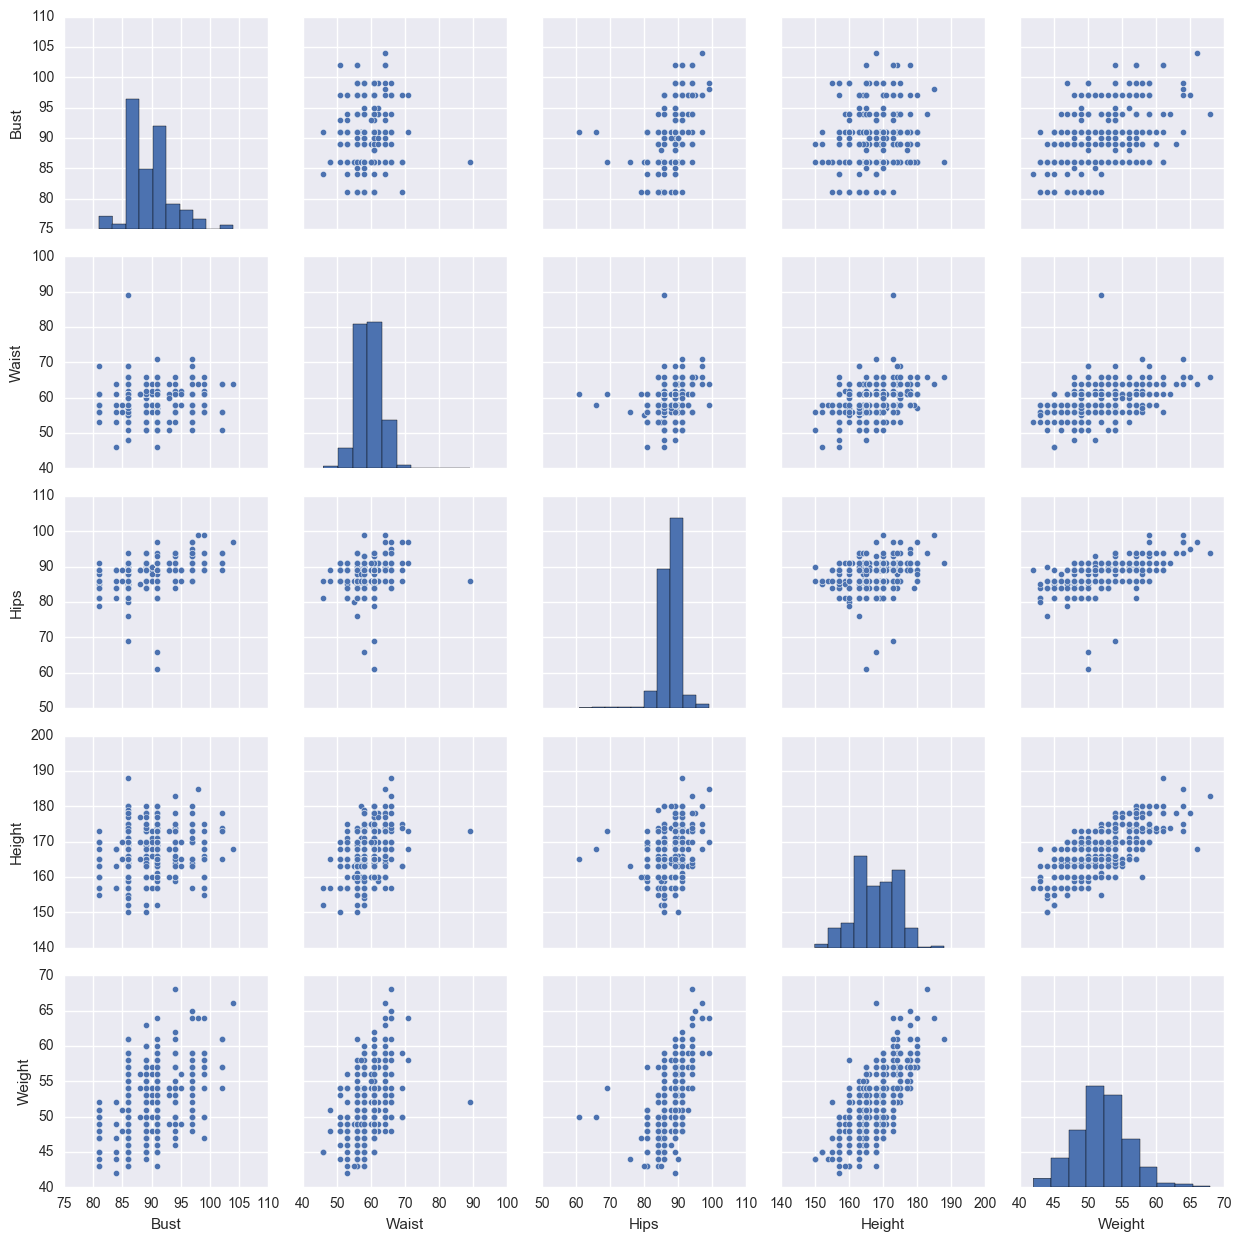

In [259]:
sns.pairplot(girls[['Bust', 'Waist', 'Hips', 'Height', 'Weight']])